In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

# Exploratory Data Analysis (EDA):

In [4]:
df.shape

(8425, 23)

In [5]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

#### Dataset contains null values in almost all columns

In [9]:
#dropping columns which are having amximum null values
df = df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Date"],axis=1)

In [10]:
df.head()

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0   Albury     13.4     22.9       0.6           W           44.0          W   
1   Albury      7.4     25.1       0.0         WNW           44.0        NNW   
2   Albury     12.9     25.7       0.0         WSW           46.0          W   
3   Albury      9.2     28.0       0.0          NE           24.0         SE   
4   Albury     17.5     32.3       1.0           W           41.0        ENE   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0        WNW          20.0          24.0         71.0         22.0   
1        WSW           4.0          22.0         44.0         25.0   
2        WSW          19.0          26.0         38.0         30.0   
3          E          11.0           9.0         45.0         16.0   
4         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No           No  
1       1010.6       1007.8     17.2     24.3        No           No  
2       1007.6       1008.7     21.0     23.2        No           No  
3       1017.6       1012.8     18.1     26.5        No           No  
4       1010.8       1006.0     17.8     29.7        No           No

In [11]:
df.shape

(8425, 18)

In [12]:
df['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [13]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

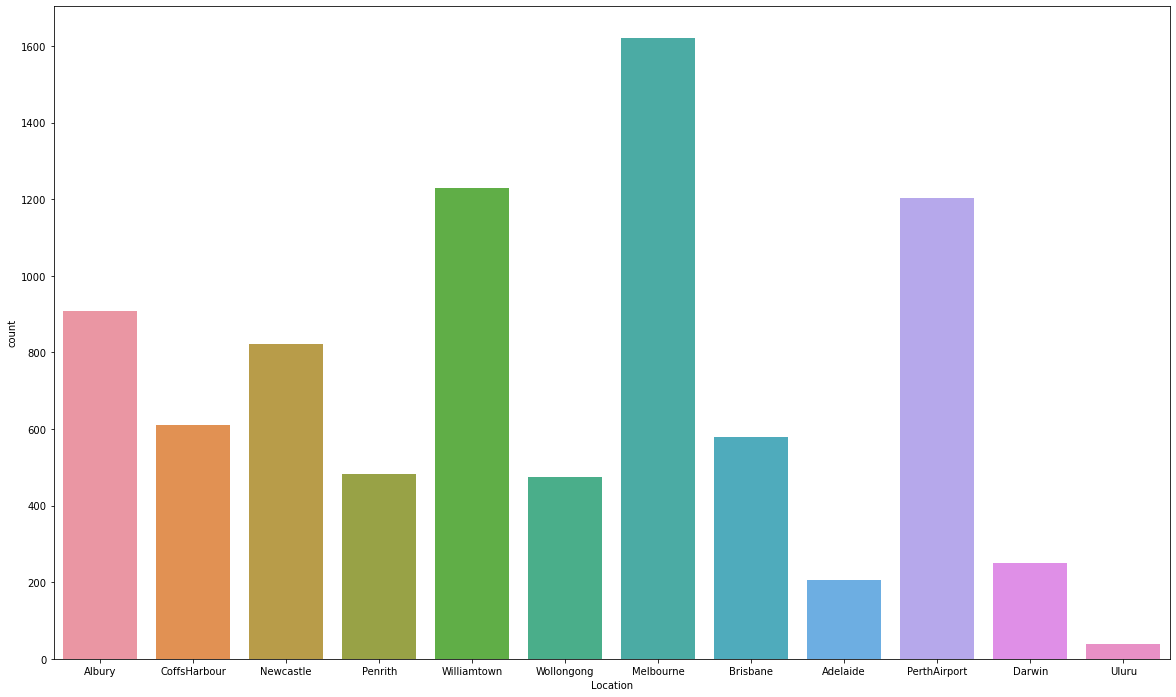

In [14]:
plt.figure(figsize=(20,12))
sns.countplot(df['Location'])
plt.show()

In [15]:
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

# Statistical Summary:

In [16]:
df.describe()

MinTemp      MaxTemp     Rainfall  WindGustSpeed  WindSpeed9am  \
count  8350.000000  8365.000000  8185.000000    7434.000000   8349.000000   
mean     13.193305    23.859976     2.805913      40.174469     13.847646   
std       5.403596     6.136408    10.459379      14.665721     10.174579   
min      -2.000000     8.200000     0.000000       7.000000      0.000000   
25%       9.200000    19.300000     0.000000      30.000000      6.000000   
50%      13.300000    23.300000     0.000000      39.000000     13.000000   
75%      17.400000    28.000000     1.000000      50.000000     20.000000   
max      28.500000    45.500000   371.000000     107.000000     63.000000   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count   8318.000000  8366.000000  8323.000000  7116.000000  7113.000000   
mean      18.533662    67.822496    51.249790  1017.640233  1015.236075   
std        9.766986    16.833283    18.423774     6.828699     6.766681   
min        0.000000    10.000000     6.000000   989.800000   982.900000   
25%       11.000000    56.000000    39.000000  1013.000000  1010.400000   
50%       19.000000    68.000000    51.000000  1017.700000  1015.300000   
75%       24.000000    80.000000    63.000000  1022.300000  1019.800000   
max       83.000000   100.000000    99.000000  1039.000000  1036.000000   

           Temp9am      Temp3pm  
count  8369.000000  8329.000000  
mean     17.762015    22.442934  
std       5.627035     5.980020  
min       1.900000     7.300000  
25%      13.800000    18.000000  
50%      17.800000    21.900000  
75%      21.900000    26.400000  
max      39.400000    44.100000

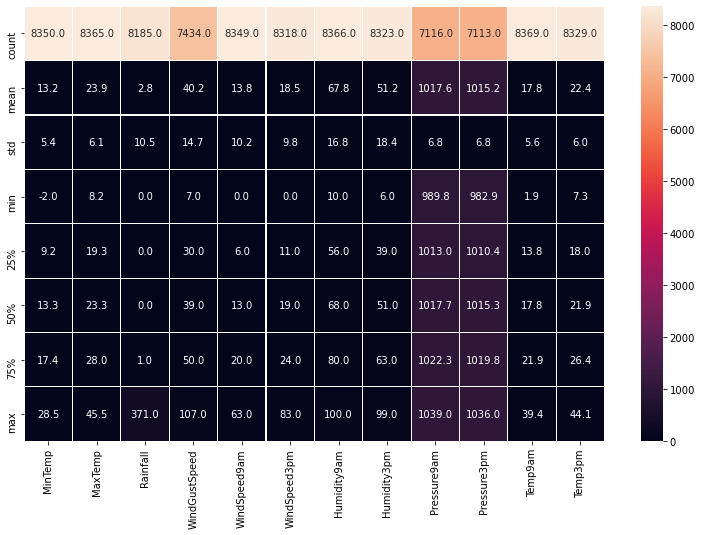

In [17]:
plt.figure(figsize=(13,8))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

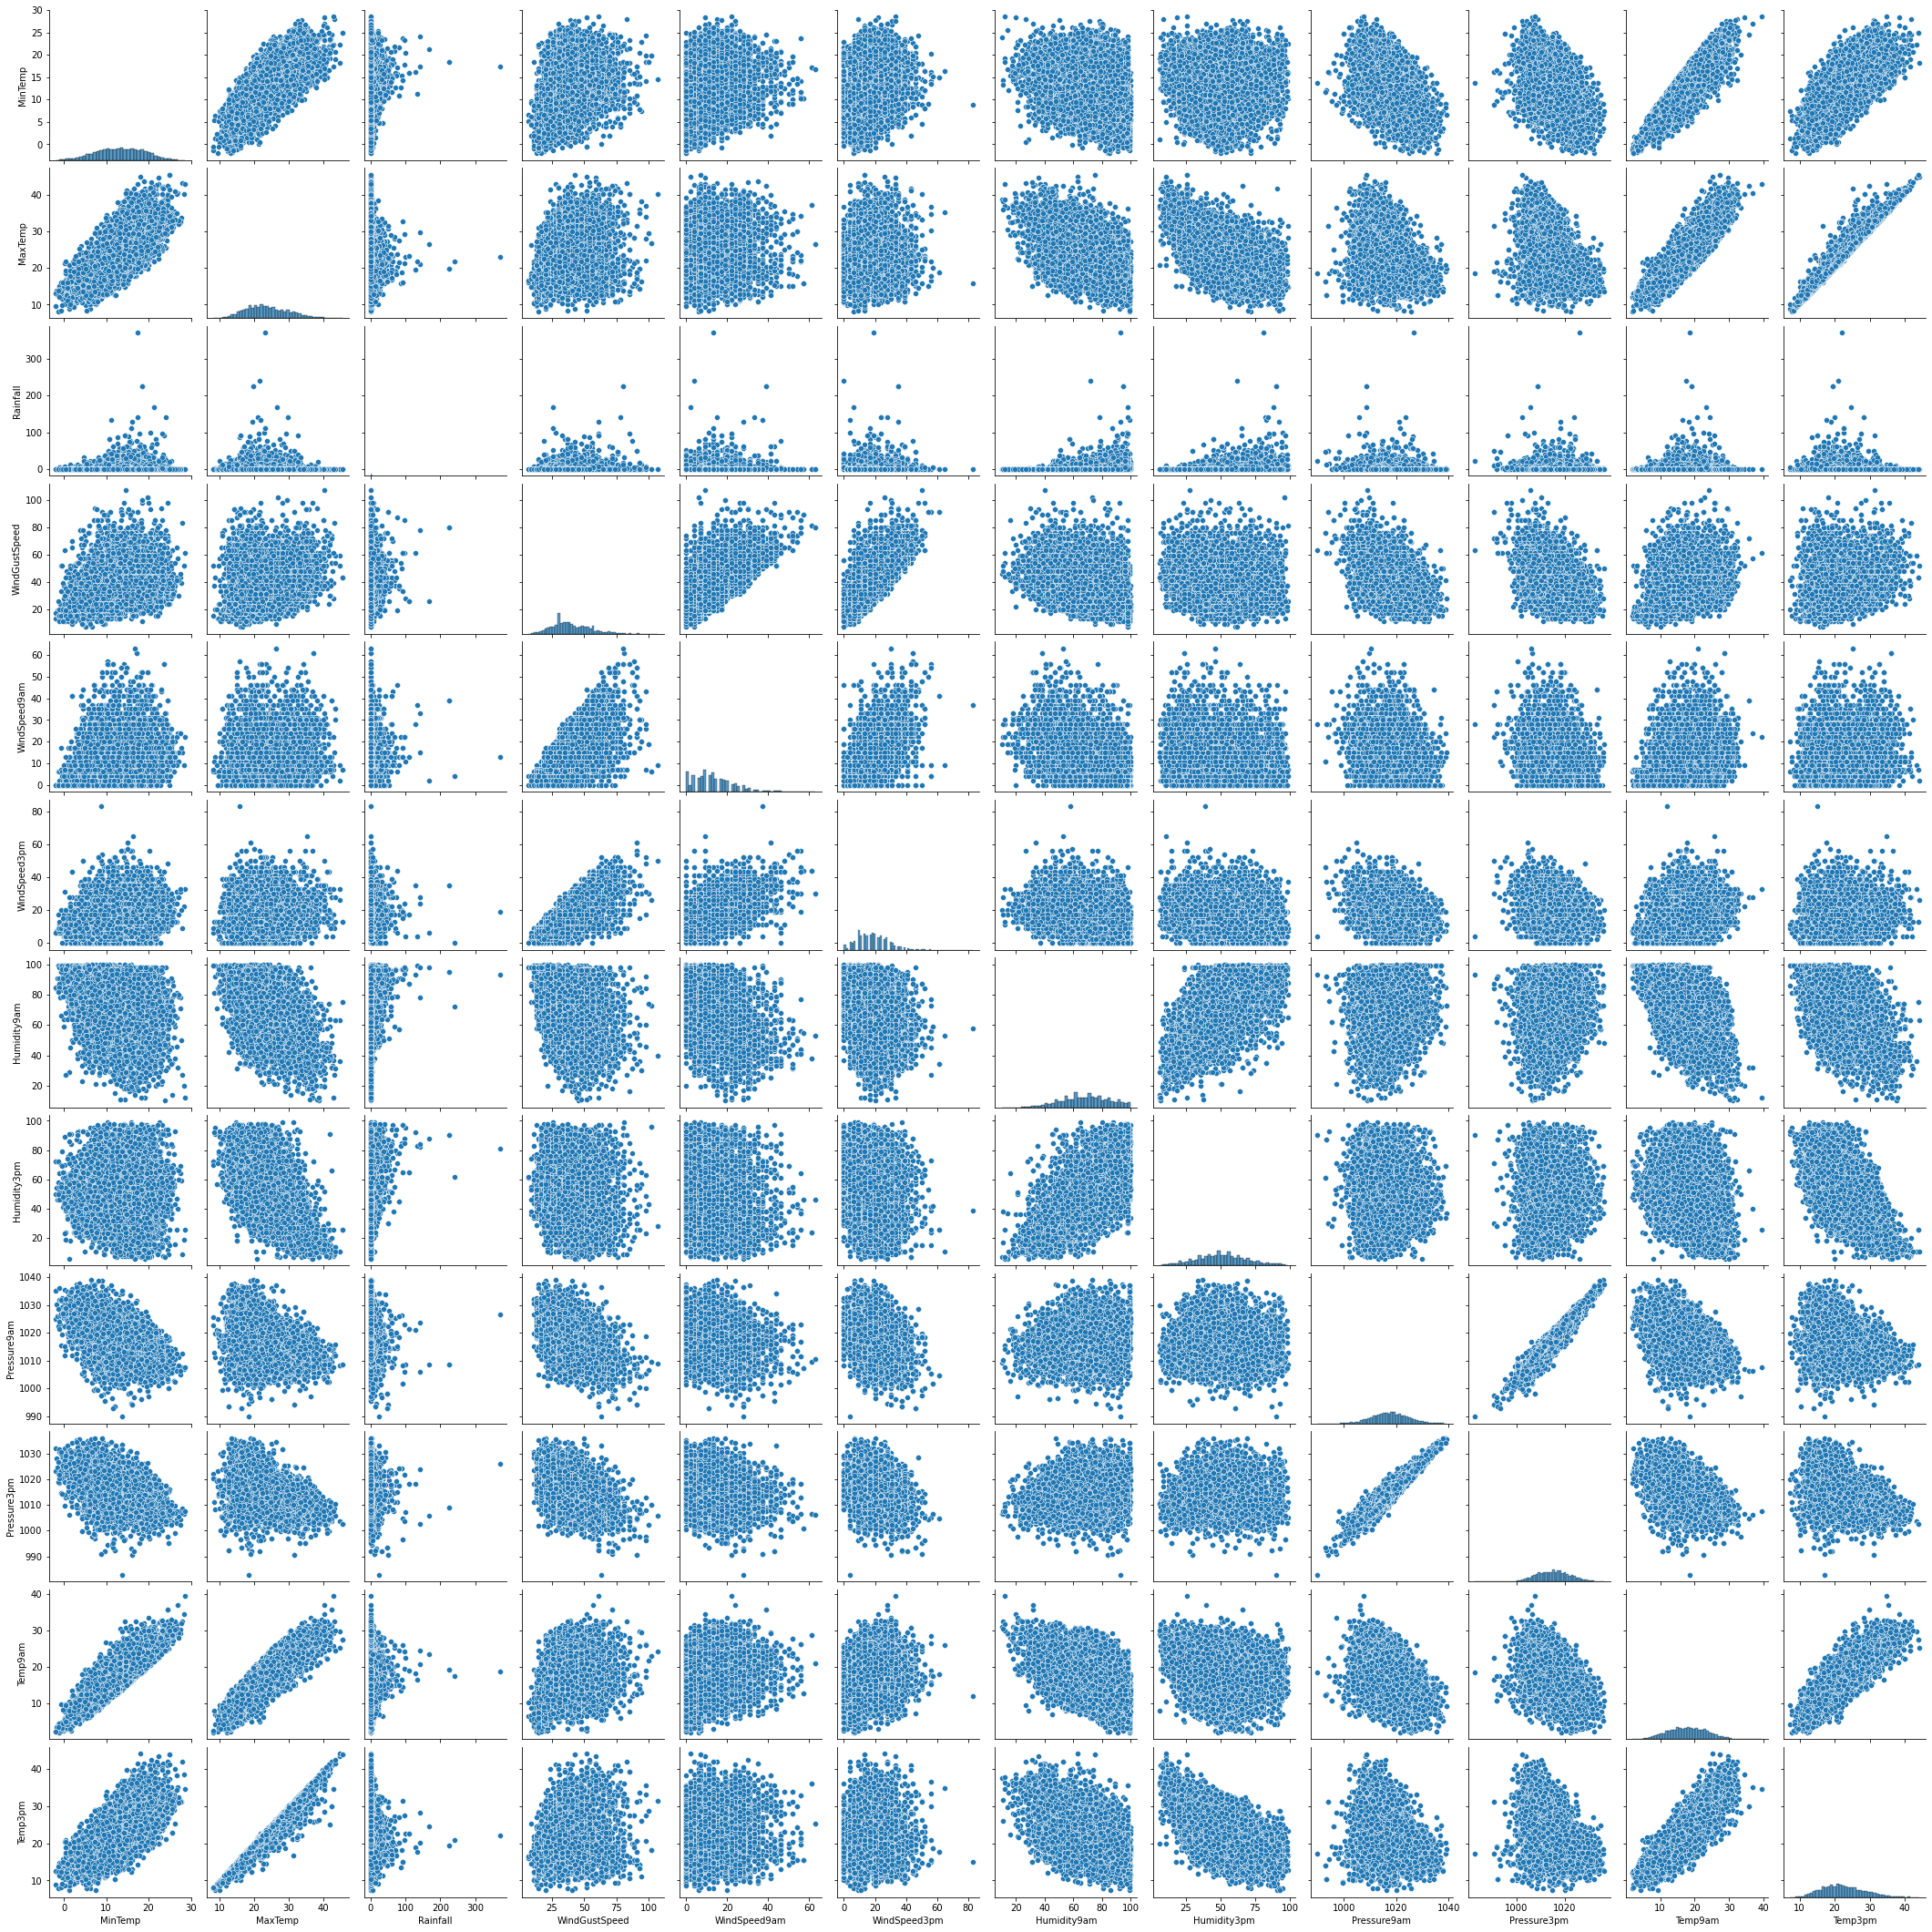

In [18]:
sns.pairplot(df)

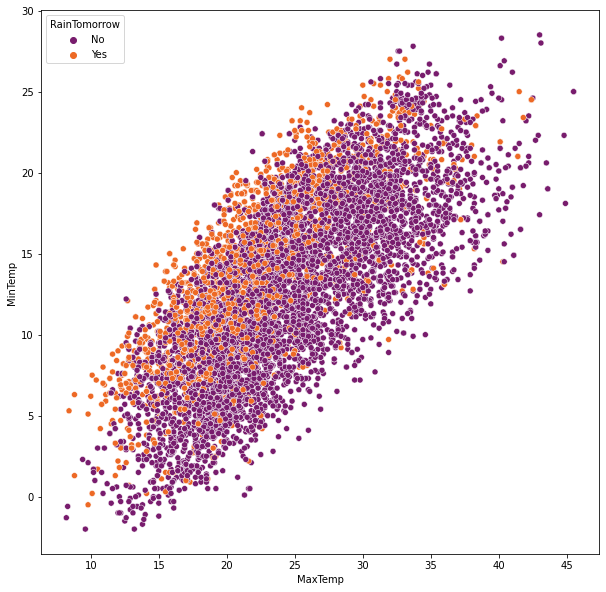

In [19]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'MaxTemp',y = 'MinTemp', hue = 'RainTomorrow', palette = 'inferno',data=df)
plt.show()

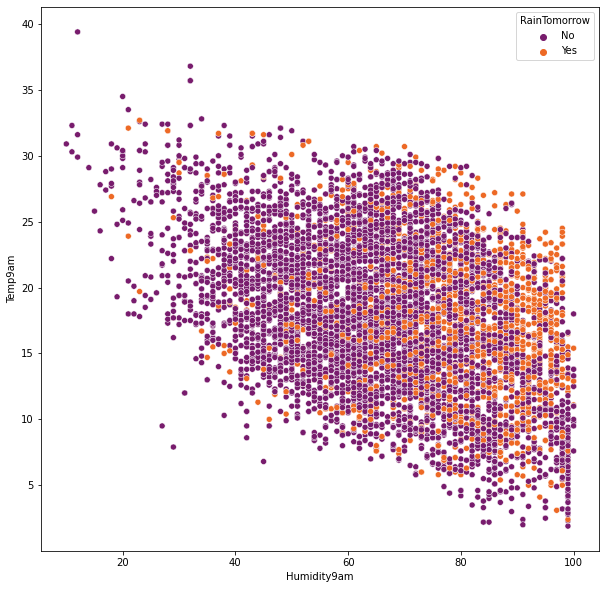

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Humidity9am',y = 'Temp9am', hue = 'RainTomorrow', palette = 'inferno',data=df)
plt.show()

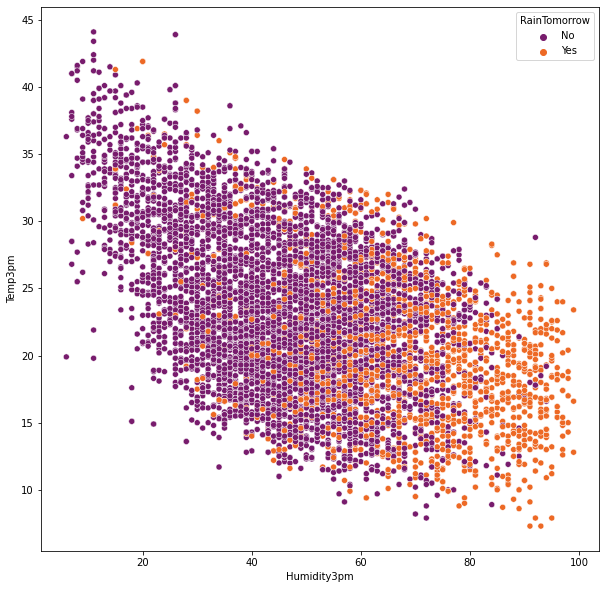

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Humidity3pm',y = 'Temp3pm', hue = 'RainTomorrow', palette = 'inferno',data=df)
plt.show()

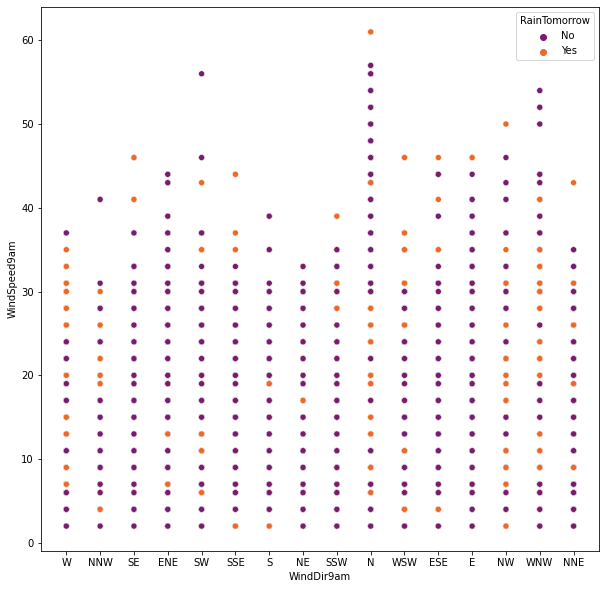

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'WindDir9am',y = 'WindSpeed9am', hue = 'RainTomorrow', palette = 'inferno',data=df)
plt.show()

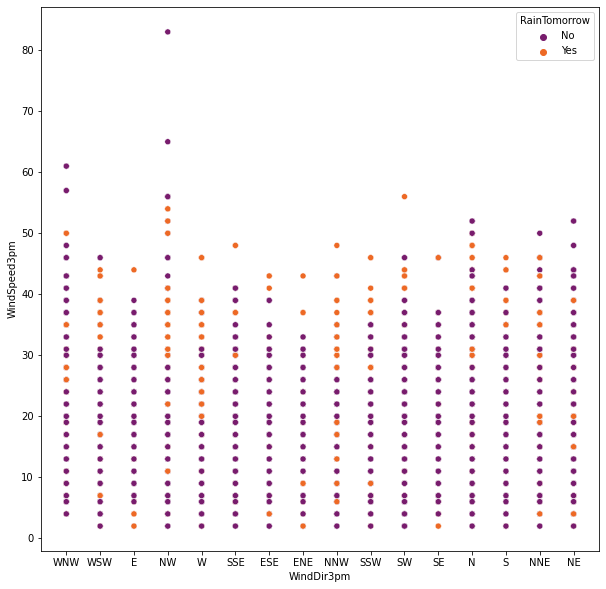

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'WindDir3pm',y = 'WindSpeed3pm', hue = 'RainTomorrow', palette = 'inferno',data=df)
plt.show()

#### Analyzing Target variable:

In [24]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [25]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

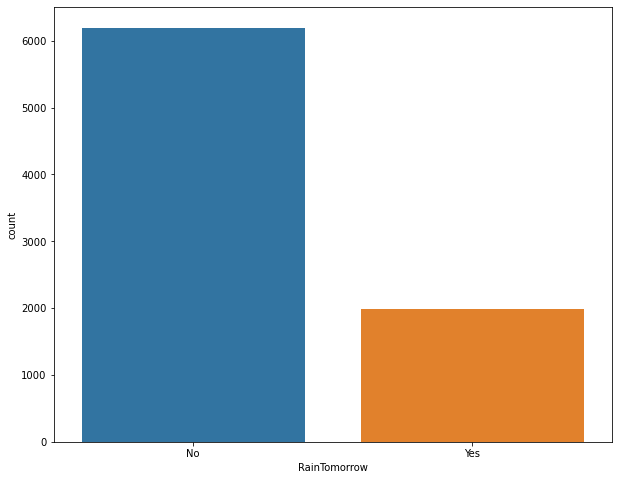

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(df['RainTomorrow'])
plt.show()

# Label Encoding:

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])

In [29]:
df['Location'] = le.fit_transform(df['Location'])

In [30]:
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])

In [31]:
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])

In [32]:
df['RainToday'] = le.fit_transform(df['RainToday'])

In [34]:
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [35]:
df

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0            1     13.4     22.9       0.6           13           44.0   
1            1      7.4     25.1       0.0           14           44.0   
2            1     12.9     25.7       0.0           15           46.0   
3            1      9.2     28.0       0.0            4           24.0   
4            1     17.5     32.3       1.0           13           41.0   
...        ...      ...      ...       ...          ...            ...   
8420         9      2.8     23.4       0.0            0           31.0   
8421         9      3.6     25.3       0.0            6           22.0   
8422         9      5.4     26.9       0.0            3           37.0   
8423         9      7.8     27.0       0.0            9           28.0   
8424         9     14.9      NaN       0.0           16            NaN   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0             13          14          20.0          24.0         71.0   
1              6          15           4.0          22.0         44.0   
2             13          15          19.0          26.0         38.0   
3              9           0          11.0           9.0         45.0   
4              1           7           7.0          20.0         82.0   
...          ...         ...           ...           ...          ...   
8420           9           1          13.0          11.0         51.0   
8421           9           3          13.0           9.0         56.0   
8422           9          14           9.0           9.0         53.0   
8423          10           3          13.0           7.0         51.0   
8424           2           2          17.0          17.0         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  \
0            22.0       1007.7       1007.1     16.9     21.8          0   
1            25.0       1010.6       1007.8     17.2     24.3          0   
2            30.0       1007.6       1008.7     21.0     23.2          0   
3            16.0       1017.6       1012.8     18.1     26.5          0   
4            33.0       1010.8       1006.0     17.8     29.7          0   
...           ...          ...          ...      ...      ...        ...   
8420         24.0       1024.6       1020.3     10.1     22.4          0   
8421         21.0       1023.5       1019.1     10.9     24.5          0   
8422         24.0       1021.0       1016.8     12.5     26.1          0   
8423         24.0       1019.4       1016.5     15.1     26.0          0   
8424         36.0       1020.2       1017.9     15.0     20.9          0   

      RainTomorrow  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
8420             0  
8421             0  
8422             0  
8423             0  
8424             2  

[8425 rows x 18 columns]

In [36]:
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Temp9am            56
Temp3pm            96
RainToday           0
RainTomorrow        0
dtype: int64

#### For Temparatures we cannot replace NaN values with 0, hence replacing NaN with its respective mode value


In [37]:
df['MinTemp'].fillna(value=df['MinTemp'].mode()[0],inplace=True )
df['MaxTemp'].fillna(value=df['MaxTemp'].mode()[0],inplace=True )

In [38]:
df['Temp9am'].fillna(value=df['Temp9am'].mode()[0],inplace=True )
df['Temp3pm'].fillna(value=df['Temp3pm'].mode()[0],inplace=True )

#### For humidity also 


In [39]:
df['Humidity9am'].fillna(value=df['Humidity9am'].mode()[0],inplace=True )
df['Humidity3pm'].fillna(value=df['Humidity3pm'].mode()[0],inplace=True )

#### For the rainfall we can replace NaN with 0. (0 which says there is no rain fall)

In [40]:
df['Rainfall'].fillna(value=0.0,inplace=True)

#### For Pressure we cannot replace NaN values with 0, hence replacing NaN with its respective median value

In [41]:
df['Pressure9am'].fillna(value=df['Pressure9am'].median(),inplace=True )
df['Pressure3pm'].fillna(value=df['Pressure3pm'].median(),inplace=True )

#### for Windspeed also

In [42]:
df['WindSpeed9am'].fillna(value=df['WindSpeed9am'].median(),inplace=True )
df['WindSpeed3pm'].fillna(value=df['WindSpeed3pm'].median(),inplace=True )

#### WindGustSpeed  replacing with median

In [43]:
df['WindGustSpeed'].fillna(value=df['WindGustSpeed'].median(),inplace=True)

In [ ]:
### for RainToday we can not fill any value,so dropiing NAN values
df = df.dropna(inplace=True)

In [44]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [45]:
df.isnull().any()

Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

### Now null values present in Dataset:

# Correlation:

In [46]:
df.corr()

Location   MinTemp   MaxTemp  Rainfall  WindGustDir  \
Location       1.000000  0.116244  0.063727  0.005801     0.005877   
MinTemp        0.116244  1.000000  0.716554  0.085226    -0.141494   
MaxTemp        0.063727  0.716554  1.000000 -0.086542    -0.209341   
Rainfall       0.005801  0.085226 -0.086542  1.000000     0.054802   
WindGustDir    0.005877 -0.141494 -0.209341  0.054802     1.000000   
WindGustSpeed  0.230018  0.230313  0.139978  0.082628     0.001020   
WindDir9am    -0.077362 -0.146331 -0.250404  0.076328     0.416568   
WindDir3pm    -0.024786 -0.158473 -0.193573  0.039079     0.511229   
WindSpeed9am   0.221035  0.137219  0.016198  0.048726    -0.158809   
WindSpeed3pm   0.231897  0.178676  0.089431  0.021594    -0.042836   
Humidity9am    0.006195 -0.131170 -0.391472  0.227291     0.105793   
Humidity3pm    0.056114  0.077566 -0.422893  0.234625     0.105385   
Pressure9am   -0.031990 -0.429389 -0.324840 -0.069595    -0.106044   
Pressure3pm   -0.020292 -0.422953 -0.402087 -0.031261    -0.033163   
Temp9am        0.117040  0.886777  0.864741 -0.007002    -0.166303   
Temp3pm        0.059716  0.687180  0.973412 -0.089931    -0.220568   
RainToday      0.029488  0.078306 -0.183992  0.354926     0.108446   
RainTomorrow   0.028247  0.106368 -0.122346  0.166511     0.052880   

               WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
Location            0.230018   -0.077362   -0.024786      0.221035   
MinTemp             0.230313   -0.146331   -0.158473      0.137219   
MaxTemp             0.139978   -0.250404   -0.193573      0.016198   
Rainfall            0.082628    0.076328    0.039079      0.048726   
WindGustDir         0.001020    0.416568    0.511229     -0.158809   
WindGustSpeed       1.000000   -0.188468    0.052414      0.606090   
WindDir9am         -0.188468    1.000000    0.263182     -0.268051   
WindDir3pm          0.052414    0.263182    1.000000     -0.019381   
WindSpeed9am        0.606090   -0.268051   -0.019381      1.000000   
WindSpeed3pm        0.639042   -0.158023   -0.001628      0.560340   
Humidity9am        -0.271896    0.208120    0.026163     -0.358553   
Humidity3pm        -0.093647    0.166046    0.018328     -0.111581   
Pressure9am        -0.407139    0.044455   -0.128973     -0.175584   
Pressure3pm        -0.372553    0.116305   -0.042372     -0.139429   
Temp9am             0.202291   -0.214538   -0.182090      0.109860   
Temp3pm             0.102218   -0.249636   -0.210459      0.000140   
RainToday           0.100012    0.134709    0.094129      0.053766   
RainTomorrow        0.189549    0.017815    0.024908      0.078429   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
Location           0.231897     0.006195     0.056114    -0.031990   
MinTemp            0.178676    -0.131170     0.077566    -0.429389   
MaxTemp            0.089431    -0.391472    -0.422893    -0.324840   
Rainfall           0.021594     0.227291     0.234625    -0.069595   
WindGustDir       -0.042836     0.105793     0.105385    -0.106044   
WindGustSpeed      0.639042    -0.271896    -0.093647    -0.407139   
WindDir9am        -0.158023     0.208120     0.166046     0.044455   
WindDir3pm        -0.001628     0.026163     0.018328    -0.128973   
WindSpeed9am       0.560340    -0.358553    -0.111581    -0.175584   
WindSpeed3pm       1.000000    -0.251098    -0.091026    -0.252752   
Humidity9am       -0.251098     1.000000     0.633913     0.142547   
Humidity3pm       -0.091026     0.633913     1.000000     0.001619   
Pressure9am       -0.252752     0.142547     0.001619     1.000000   
Pressure3pm       -0.208694     0.173575     0.070234     0.961435   
Temp9am            0.184253    -0.378946    -0.132231    -0.410268   
Temp3pm            0.065625    -0.383237    -0.491816    -0.282895   
RainToday          0.057425     0.325116     0.301597    -0.129124   
RainTomorrow       0.067111     0.244390     0.383762    -0.172351   

               Pressur

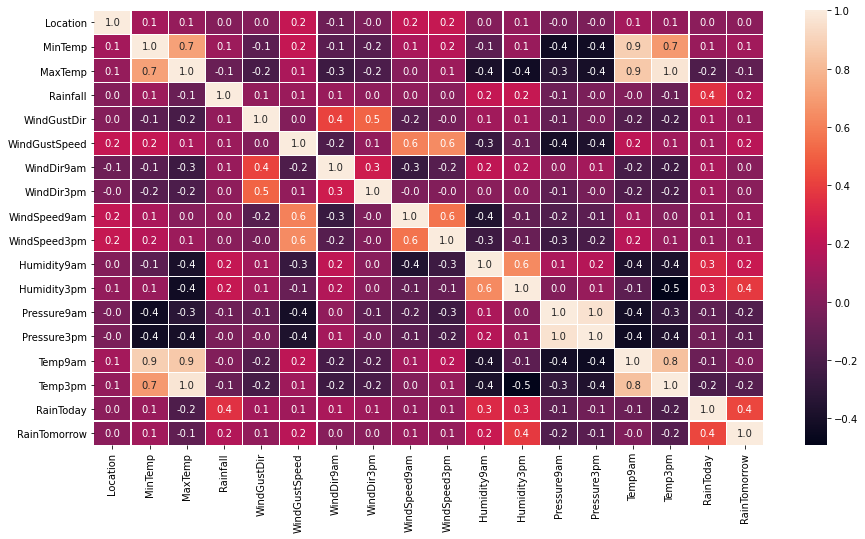

In [47]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

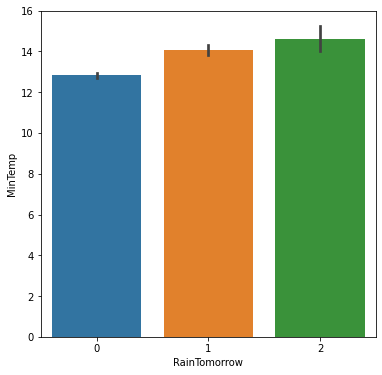

In [48]:
#visualize correlation
plt.figure(figsize=(6,6))
sns.barplot(x="RainTomorrow", y="MinTemp", data=df)
plt.show()

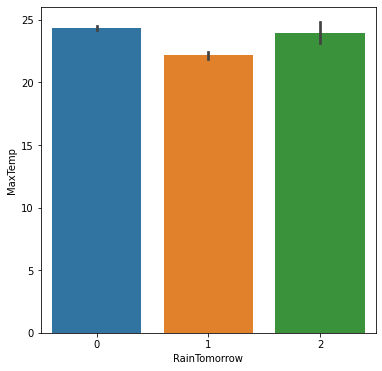

In [49]:
plt.figure(figsize=(6,6))
sns.barplot(x="RainTomorrow", y="MaxTemp", data=df)
plt.show()

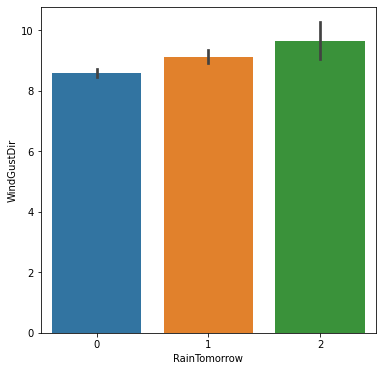

In [50]:
plt.figure(figsize=(6,6))
sns.barplot(x="RainTomorrow", y="WindGustDir", data=df)
plt.show()

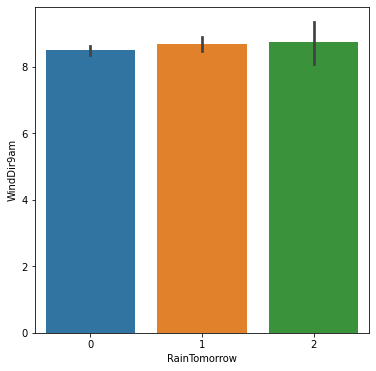

In [51]:
plt.figure(figsize=(6,6))
sns.barplot(x="RainTomorrow", y="WindDir9am", data=df)
plt.show()

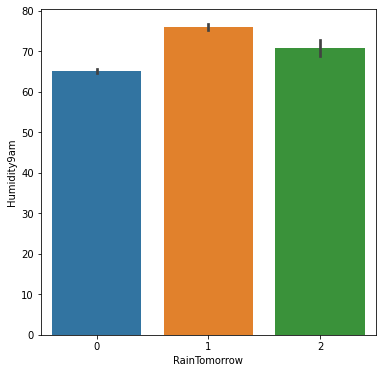

In [52]:
plt.figure(figsize=(6,6))
sns.barplot(x="RainTomorrow", y="Humidity9am", data=df)
plt.show()

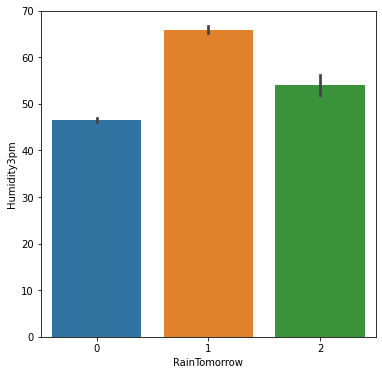

In [53]:
plt.figure(figsize=(6,6))
sns.barplot(x="RainTomorrow", y="Humidity3pm", data=df)
plt.show()

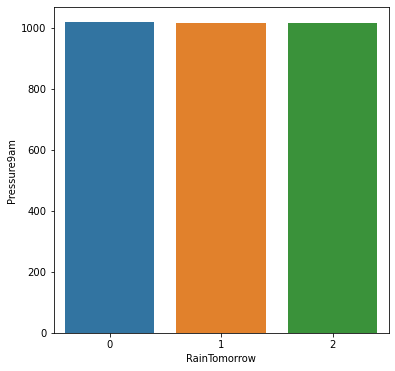

In [54]:
plt.figure(figsize=(6,6))
sns.barplot(x="RainTomorrow", y="Pressure9am", data=df)
plt.show()

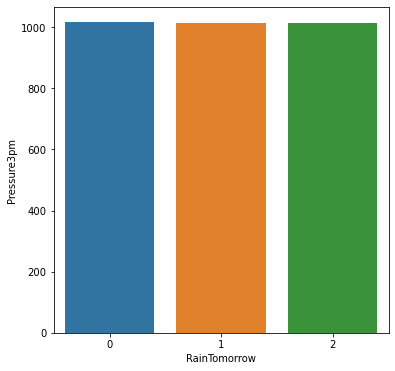

In [55]:
plt.figure(figsize=(6,6))
sns.barplot(x="RainTomorrow", y="Pressure3pm", data=df)
plt.show()

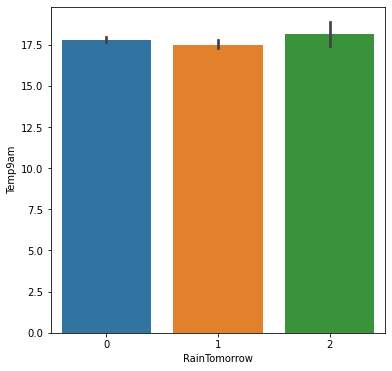

In [56]:
plt.figure(figsize=(6,6))
sns.barplot(x="RainTomorrow", y="Temp9am", data=df)
plt.show()

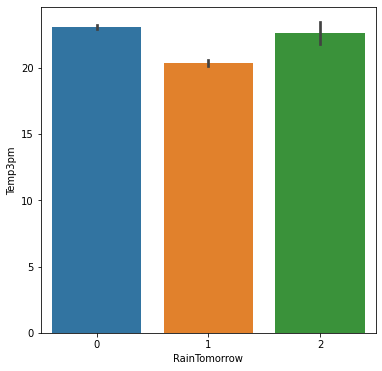

In [57]:
plt.figure(figsize=(6,6))
sns.barplot(x="RainTomorrow", y="Temp3pm", data=df)
plt.show()

# Checking For Outliers:

In [59]:
X = df.drop(columns = ['RainTomorrow'])
y = df['RainTomorrow']

In [62]:
df

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0            1     13.4     22.9       0.6           13           44.0   
1            1      7.4     25.1       0.0           14           44.0   
2            1     12.9     25.7       0.0           15           46.0   
3            1      9.2     28.0       0.0            4           24.0   
4            1     17.5     32.3       1.0           13           41.0   
...        ...      ...      ...       ...          ...            ...   
8420         9      2.8     23.4       0.0            0           31.0   
8421         9      3.6     25.3       0.0            6           22.0   
8422         9      5.4     26.9       0.0            3           37.0   
8423         9      7.8     27.0       0.0            9           28.0   
8424         9     14.9     19.0       0.0           16           39.0   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0             13          14          20.0          24.0         71.0   
1              6          15           4.0          22.0         44.0   
2             13          15          19.0          26.0         38.0   
3              9           0          11.0           9.0         45.0   
4              1           7           7.0          20.0         82.0   
...          ...         ...           ...           ...          ...   
8420           9           1          13.0          11.0         51.0   
8421           9           3          13.0           9.0         56.0   
8422           9          14           9.0           9.0         53.0   
8423          10           3          13.0           7.0         51.0   
8424           2           2          17.0          17.0         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  \
0            22.0       1007.7       1007.1     16.9     21.8          0   
1            25.0       1010.6       1007.8     17.2     24.3          0   
2            30.0       1007.6       1008.7     21.0     23.2          0   
3            16.0       1017.6       1012.8     18.1     26.5          0   
4            33.0       1010.8       1006.0     17.8     29.7          0   
...           ...          ...          ...      ...      ...        ...   
8420         24.0       1024.6       1020.3     10.1     22.4          0   
8421         21.0       1023.5       1019.1     10.9     24.5          0   
8422         24.0       1021.0       1016.8     12.5     26.1          0   
8423         24.0       1019.4       1016.5     15.1     26.0          0   
8424         36.0       1020.2       1017.9     15.0     20.9          0   

      RainTomorrow  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
8420             0  
8421             0  
8422             0  
8423             0  
8424             2  

[8425 rows x 18 columns]

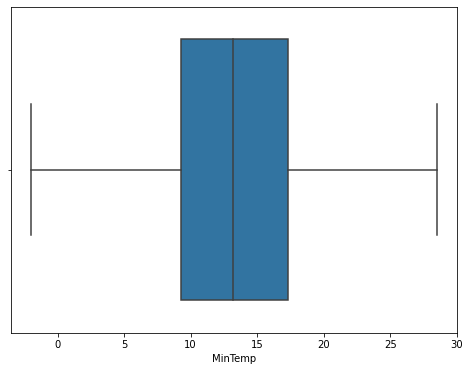

In [63]:
plt.figure(figsize=(8,6))
sns.boxplot(df['MinTemp'])
plt.show()

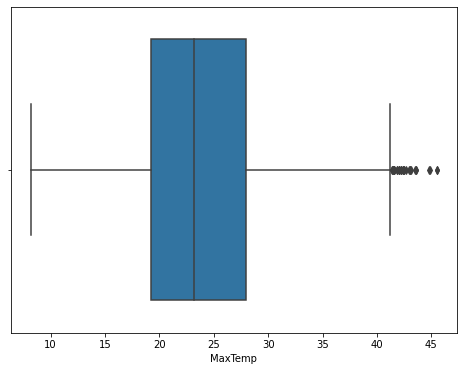

In [64]:
plt.figure(figsize=(8,6))
sns.boxplot(df['MaxTemp'])
plt.show()

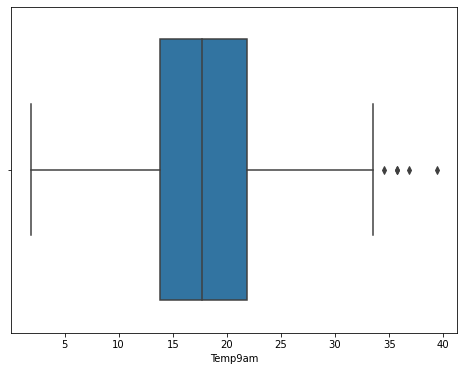

In [65]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Temp9am'])
plt.show()

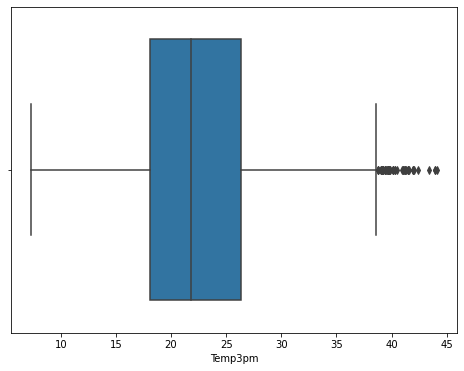

In [66]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Temp3pm'])
plt.show()

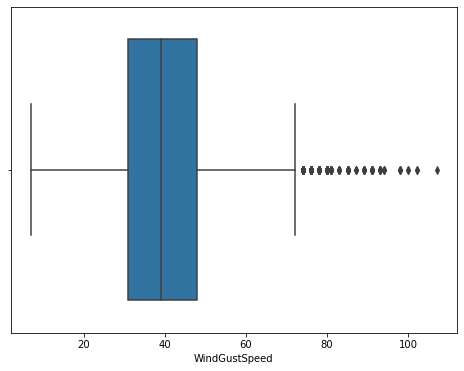

In [67]:
plt.figure(figsize=(8,6))
sns.boxplot(df['WindGustSpeed'])
plt.show()

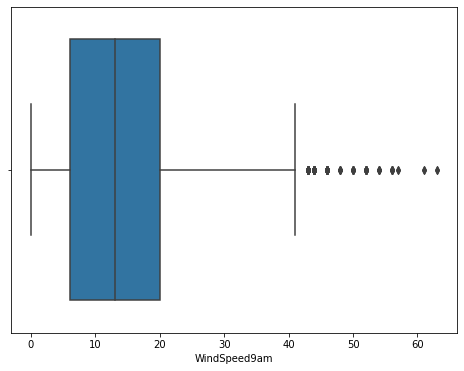

In [68]:
plt.figure(figsize=(8,6))
sns.boxplot(df['WindSpeed9am'])
plt.show()

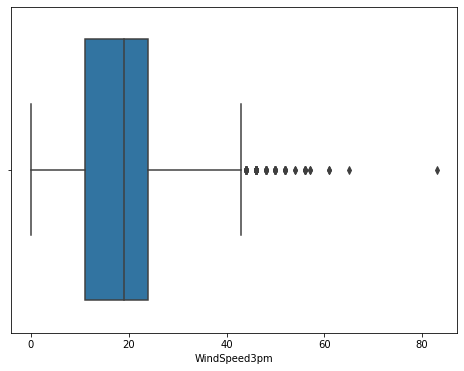

In [69]:
plt.figure(figsize=(8,6))
sns.boxplot(df['WindSpeed3pm'])
plt.show()

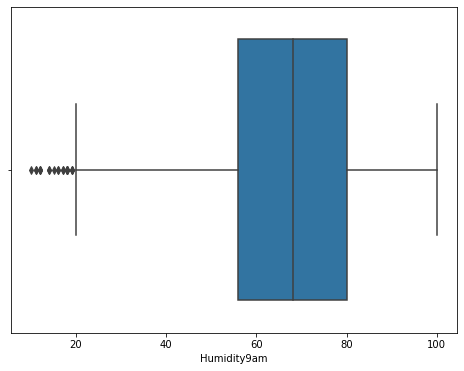

In [70]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Humidity9am'])
plt.show()

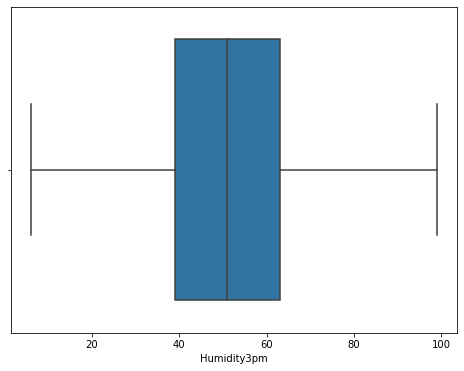

In [71]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Humidity3pm'])
plt.show()

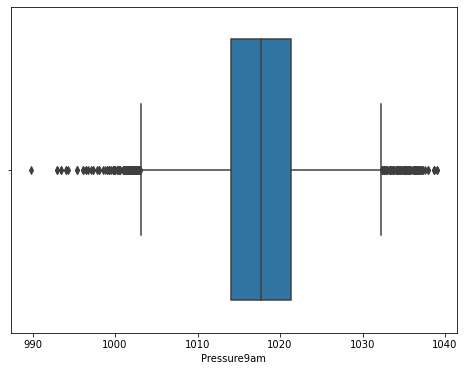

In [72]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Pressure9am'])
plt.show()

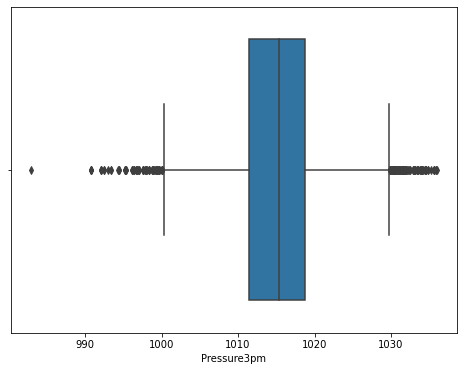

In [73]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Pressure3pm'])
plt.show()

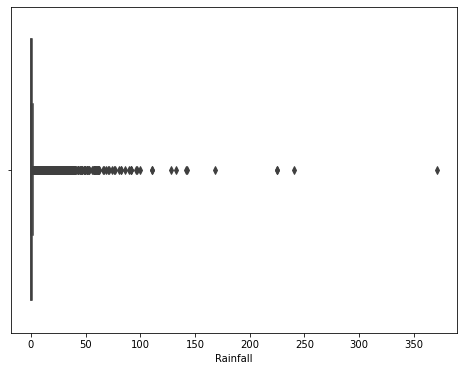

In [74]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Rainfall'])
plt.show()

# Removing Outliers:

In [75]:
from scipy.stats import zscore
z = zscore

In [76]:
df1 =  X[['MaxTemp','Temp9am','Temp3pm','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Rainfall']].copy()

In [77]:
Z = zscore(df1)

In [78]:
z_abs_score = np.abs(Z)

In [79]:
#taking thresold value as 3
df2 = df1[(z_abs_score < 3).all(axis=1)]

In [80]:
df2.shape

(8061, 11)

In [81]:
df1.shape

(8425, 11)

# percenatge of dataloss

In [83]:
data_loss = (8425-8061)/8425*100
data_loss

4.320474777448071

# 4.32% data loss is acceptable

In [84]:
dropindx = X.index.difference(df2.index)

In [85]:
df.drop(dropindx,inplace = True) #dropping the outlier Dataframe

In [86]:
df.shape

(8061, 18)

# Checking For Skewness: 

In [87]:
df.skew()

Location        -0.052587
MinTemp         -0.085368
MaxTemp          0.320432
Rainfall         3.509229
WindGustDir     -0.191578
WindGustSpeed    0.542563
WindDir9am      -0.087087
WindDir3pm      -0.072723
WindSpeed9am     0.715731
WindSpeed3pm     0.294523
Humidity9am     -0.234171
Humidity3pm      0.119951
Pressure9am      0.010473
Pressure3pm      0.038546
Temp9am         -0.035279
Temp3pm          0.343569
RainToday        1.584939
RainTomorrow     1.578685
dtype: float64

In [88]:
X = df.drop(columns = ['RainTomorrow'])
y = df['RainTomorrow']

In [90]:
X.skew()

Location        -0.052587
MinTemp         -0.085368
MaxTemp          0.320432
Rainfall         3.509229
WindGustDir     -0.191578
WindGustSpeed    0.542563
WindDir9am      -0.087087
WindDir3pm      -0.072723
WindSpeed9am     0.715731
WindSpeed3pm     0.294523
Humidity9am     -0.234171
Humidity3pm      0.119951
Pressure9am      0.010473
Pressure3pm      0.038546
Temp9am         -0.035279
Temp3pm          0.343569
RainToday        1.584939
dtype: float64

#### Plotting Skewness

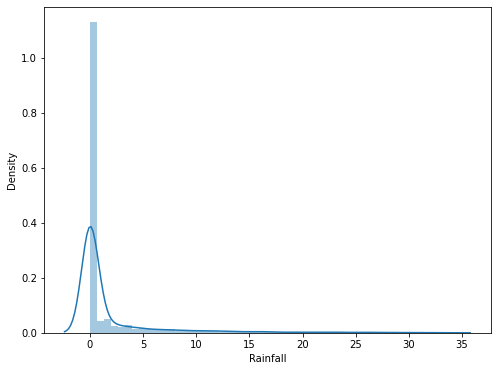

In [92]:
plt.figure(figsize=(8,6))
sns.distplot(df['Rainfall'])
plt.show()

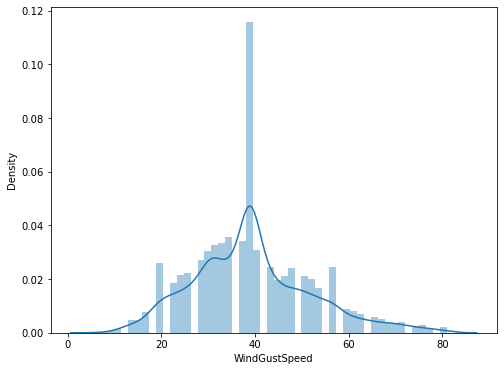

In [93]:
plt.figure(figsize=(8,6))
sns.distplot(df['WindGustSpeed'])
plt.show()

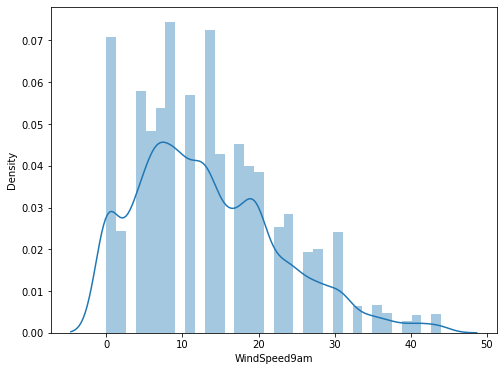

In [94]:
plt.figure(figsize=(8,6))
sns.distplot(df['WindSpeed9am'])
plt.show()

# Standerd Scaler Method

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [97]:
scaled_X

array([[-1.51086857,  0.05367233, -0.14601927, ..., -0.09857628,
        -0.55650001, -0.55716373],
       [-1.51086857, -1.06141177,  0.21903816, ...,  0.32820922,
        -0.55650001, -0.55716373],
       [-1.51086857, -0.03925135,  0.31859928, ...,  0.1404236 ,
        -0.55650001, -0.55716373],
       ...,
       [ 1.01631129, -1.43310647,  0.51772151, ...,  0.63549477,
        -0.55650001, -0.55716373],
       [ 1.01631129, -0.98707283,  0.53431503, ...,  0.61842335,
        -0.55650001, -0.55716373],
       [ 1.01631129,  0.33244335, -0.79316653, ..., -0.25221906,
        -0.55650001,  3.37051168]])

# Principle Component Analysis:

In [174]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)

In [175]:
component = pca.fit_transform(scaled_X)

In [176]:
pca.fit(scaled_X)

PCA(n_components=8)

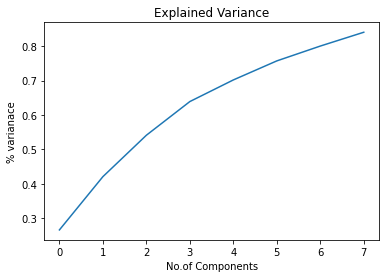

In [177]:
#visualzise
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No.of Components')
plt.ylabel('% varianace')
plt.title('Explained Variance')
plt.show()

In [178]:
final = PCA(n_components=8)
final_data = final.fit_transform(scaled_X)
pca_X = pd.DataFrame(final_data)
pca_X

0         1         2         3         4         5         6  \
0     0.799913  0.552823  0.448608 -2.868888  1.222099  0.630225  0.054268   
1     0.889523 -0.616273  0.451871 -3.119264  1.525910  0.899387  0.061406   
2     1.678419  0.280494  0.806929 -3.433998  0.717445  0.889466 -0.644679   
3     0.981911 -2.853081 -0.418701 -0.139421  1.560150  1.580888  0.142178   
4     2.176547 -0.395607 -1.211520 -0.983834  1.527526  0.276286  0.428517   
...        ...       ...       ...       ...       ...       ...       ...   
8056 -0.972526 -2.823617  1.471265  1.109157  0.297506  0.414414  1.137075   
8057 -0.902717 -2.780203  0.753606  0.262206 -0.101861  0.326821  1.172940   
8058 -0.224144 -2.005088  0.788193 -0.870853 -0.234735  0.302407  1.034239   
8059  0.174964 -2.220092  0.221945 -0.301712 -0.255775  0.115032  1.003104   
8060 -0.239430  0.536369  0.810134  0.960422  0.185013 -0.824452 -1.668191   

             7  
0    -0.854704  
1     0.493324  
2    -0.775754  
3    -0.128930  
4     0.071771  
...        ...  
8056  0.741087  
8057  1.138391  
8058  1.599091  
8059  0.917713  
8060  2.436259  

[8061 rows x 8 columns]

# Model Building:

# Model for Predicting Will it RainTomorrow

In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

In [179]:
X_train,X_test,y_train,y_test = train_test_split(pca_X,y,test_size=.30,random_state=40)

### LogisticRegression

In [180]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [181]:
lr.score(X_train,y_train)

0.9927330733782347

In [182]:
pred_lr = lr.predict(X_test)

In [183]:
print(accuracy_score(y_test,pred_lr))

0.9950392724266226


In [184]:
print(confusion_matrix(y_test,pred_lr))

[[1813    7    0]
 [   2  540    0]
 [   0    3   54]]


In [185]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1820
           1       0.98      1.00      0.99       542
           2       1.00      0.95      0.97        57

    accuracy                           1.00      2419
   macro avg       0.99      0.98      0.99      2419
weighted avg       1.00      1.00      1.00      2419



### KNeighborsClassifier

In [186]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [187]:
knn.score(X_train,y_train)

0.988833746898263

In [188]:
pred_knn = knn.predict(X_test)

In [189]:
print(accuracy_score(y_test,pred_knn))

0.9834642414220752


In [190]:
print(confusion_matrix(y_test,pred_knn))

[[1816    4    0]
 [  23  519    0]
 [   0   13   44]]


In [191]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1820
           1       0.97      0.96      0.96       542
           2       1.00      0.77      0.87        57

    accuracy                           0.98      2419
   macro avg       0.99      0.91      0.94      2419
weighted avg       0.98      0.98      0.98      2419



### DecisionTreeClassifier

In [192]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [193]:
dtc.score(X_train,y_train)

1.0

In [194]:
pred_dtc = dtc.predict(X_test)

In [195]:
print(accuracy_score(y_test,pred_dtc))

0.9739561802397685


In [196]:
print(confusion_matrix(y_test,pred_dtc))

[[1787   33    0]
 [  27  515    0]
 [   0    3   54]]


In [197]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1820
           1       0.93      0.95      0.94       542
           2       1.00      0.95      0.97        57

    accuracy                           0.97      2419
   macro avg       0.97      0.96      0.97      2419
weighted avg       0.97      0.97      0.97      2419



### RandomForestClassifier:

In [198]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [199]:
rfc.score(X_train,y_train)

1.0

In [200]:
pred_rfc = rfc.predict(X_test)

In [201]:
print(accuracy_score(y_test,pred_rfc))

0.9917321207110377


In [202]:
print(confusion_matrix(y_test,pred_rfc))

[[1817    3    0]
 [  11  531    0]
 [   0    6   51]]


In [203]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1820
           1       0.98      0.98      0.98       542
           2       1.00      0.89      0.94        57

    accuracy                           0.99      2419
   macro avg       0.99      0.96      0.97      2419
weighted avg       0.99      0.99      0.99      2419



### XGBClassifier:

In [204]:
xgb  = XGBClassifier()
xgb.fit(X_train,y_train)

[18:05:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [205]:
xgb.score(X_train,y_train)

1.0

In [206]:
pred_xg = xgb.predict(X_test)

In [207]:
print(accuracy_score(y_test,pred_xg))

0.9925589086399339


In [208]:
print(confusion_matrix(y_test,pred_xg))

[[1816    4    0]
 [   8  534    0]
 [   0    6   51]]


In [209]:
print(classification_report(y_test,pred_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1820
           1       0.98      0.99      0.98       542
           2       1.00      0.89      0.94        57

    accuracy                           0.99      2419
   macro avg       0.99      0.96      0.97      2419
weighted avg       0.99      0.99      0.99      2419



# Cross Valiadation:

#### logisticRegression:

In [211]:
print(cross_val_score(lr,pca_X,y,cv=5).mean())

0.9916886525270021


#### KNeighbors Classifier

In [212]:
print(cross_val_score(knn,pca_X,y,cv=5).mean())

0.9735768930787229


#### Decision Tree Classifier:

In [213]:
print(cross_val_score(dtc,pca_X,y,cv=5).mean())

0.9642742973883106


#### Random Forest Classifier

In [214]:
print(cross_val_score(rfc,pca_X,y,cv=5).mean())

0.9887111388701293


#### XGBClassifier:

In [215]:
print(cross_val_score(xgb,pca_X,y,cv=5).mean())

[18:06:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

# Hyper Parameter Tuning:

In [218]:
parameters={'C':[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**2, 10**3] }

In [219]:
logr = LogisticRegression(penalty='l2',class_weight='balanced')

In [220]:
LR = GridSearchCV(logr, parameters, cv=5)

In [221]:
LR.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.01, 1, 100, 1000]})

In [222]:
LR.best_params_

{'C': 1e-06}

In [223]:
rain_m = LogisticRegression()
rain_m.fit(X_train,y_train)
pred_LR = rain_m.predict(X_test)
acc = accuracy_score(y_test,pred_LR)
print(acc*100)

99.50392724266226


# Yes, there is a [99.50] % chance of rain can fall on tommorow 

# saving

In [229]:
import joblib
joblib.dump(rain_m,'RainTomorrow.pkl')

['RainTomorrow.pkl']

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#    NOW Building Model for predicting How much it will Rain

In [230]:
df

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0            1     13.4     22.9       0.6           13           44.0   
1            1      7.4     25.1       0.0           14           44.0   
2            1     12.9     25.7       0.0           15           46.0   
3            1      9.2     28.0       0.0            4           24.0   
4            1     17.5     32.3       1.0           13           41.0   
...        ...      ...      ...       ...          ...            ...   
8420         9      2.8     23.4       0.0            0           31.0   
8421         9      3.6     25.3       0.0            6           22.0   
8422         9      5.4     26.9       0.0            3           37.0   
8423         9      7.8     27.0       0.0            9           28.0   
8424         9     14.9     19.0       0.0           16           39.0   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0             13          14          20.0          24.0         71.0   
1              6          15           4.0          22.0         44.0   
2             13          15          19.0          26.0         38.0   
3              9           0          11.0           9.0         45.0   
4              1           7           7.0          20.0         82.0   
...          ...         ...           ...           ...          ...   
8420           9           1          13.0          11.0         51.0   
8421           9           3          13.0           9.0         56.0   
8422           9          14           9.0           9.0         53.0   
8423          10           3          13.0           7.0         51.0   
8424           2           2          17.0          17.0         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  \
0            22.0       1007.7       1007.1     16.9     21.8          0   
1            25.0       1010.6       1007.8     17.2     24.3          0   
2            30.0       1007.6       1008.7     21.0     23.2          0   
3            16.0       1017.6       1012.8     18.1     26.5          0   
4            33.0       1010.8       1006.0     17.8     29.7          0   
...           ...          ...          ...      ...      ...        ...   
8420         24.0       1024.6       1020.3     10.1     22.4          0   
8421         21.0       1023.5       1019.1     10.9     24.5          0   
8422         24.0       1021.0       1016.8     12.5     26.1          0   
8423         24.0       1019.4       1016.5     15.1     26.0          0   
8424         36.0       1020.2       1017.9     15.0     20.9          0   

      RainTomorrow  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
8420             0  
8421             0  
8422             0  
8423             0  
8424             2  

[8061 rows x 18 columns]

In [231]:
df['Rainfall'].unique()

array([ 0.6,  0. ,  1. ,  0.2,  1.4,  2.2,  3.6, 16.8, 10.6,  1.2,  0.8,
        6.4,  0.4,  3. ,  5.8, 11.6,  1.8, 12.6,  8.4,  6.2, 20. , 21. ,
        3.2,  4.8,  4.2,  8. , 14.4,  4.6,  2. ,  5.6,  1.6,  6. ,  4.4,
        5.4,  5. ,  7.8,  6.8,  9.8,  3.8,  2.4,  5.2,  6.6, 13.4, 10.2,
        7. , 25.8,  9.4, 12.4,  8.6, 20.6, 11. , 17. , 10.4, 28. , 21.4,
       18.6,  7.2,  8.2, 10.8, 15.4,  9.6,  4. , 21.8, 20.8, 24.8, 10. ,
       11.4, 19. , 32.8,  3.4, 19.2, 18.8, 14.8, 12. , 18.4, 25.6, 14.2,
       13.8,  2.6, 28.2, 12.2, 12.8, 11.8, 19.8, 17.4,  8.8, 24.4,  7.4,
       15.6,  9.2, 21.2, 11.2, 29.8, 20.2, 19.6,  2.8, 13.6, 15.2,  9. ,
       29.4, 13.2, 24. , 18.2, 33.4,  7.6, 16.2, 13. , 23.8, 27.6, 15.8,
       30.8, 14.6, 20.4, 15. , 23. , 31.1, 27.8, 15.7,  0.5,  0.1, 26. ,
       22.5, 17.2, 22.8,  0.7,  1.5, 31.4, 32.4,  6.3, 17.6, 30. , 27.2,
       23.4, 16.4, 26.4, 25. , 30.2, 25.2,  8.7,  2.1,  1.9,  5.5,  2.3,
        2.5,  2.9, 28.4, 16. , 33. , 19.4, 23.6, 31

In [234]:
df['Rainfall'].value_counts()

0.0     5357
0.2      394
0.4      176
0.6      115
1.2       82
        ... 
29.6       1
21.6       1
31.2       1
27.0       1
32.6       1
Name: Rainfall, Length: 170, dtype: int64

In [236]:
df['Rainfall'].isnull().sum()

0

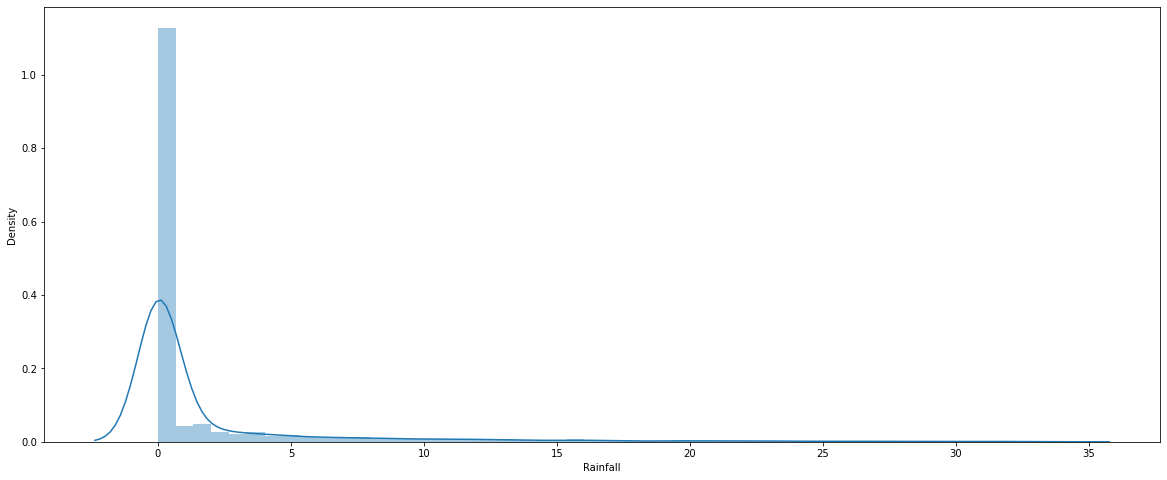

In [242]:
plt.figure(figsize=(20,8))
sns.distplot(df['Rainfall'])
plt.show()

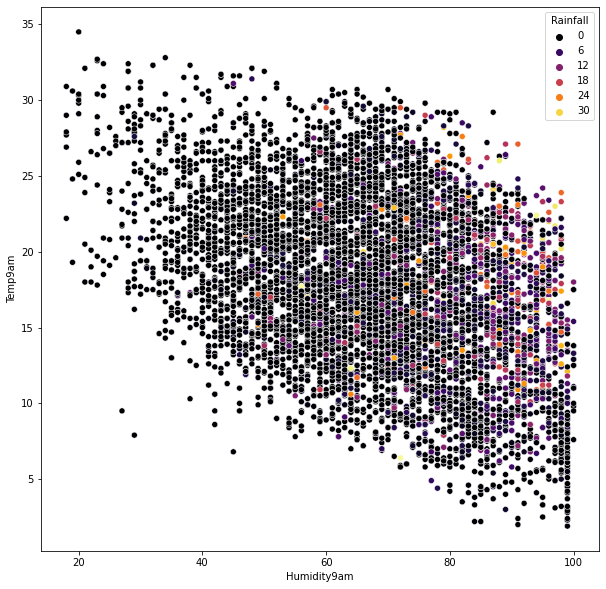

In [243]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Humidity9am',y = 'Temp9am', hue = 'Rainfall', palette = 'inferno',data=df)
plt.show()

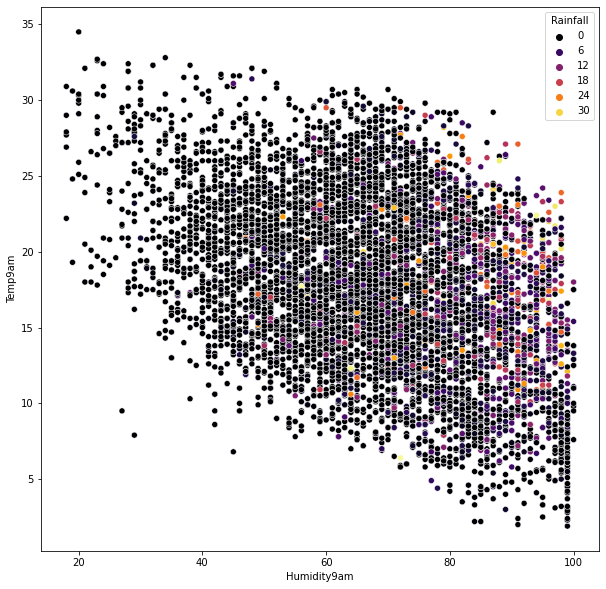

In [245]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Humidity9am',y = 'Temp9am', hue = 'Rainfall', palette = 'inferno',data=df)
plt.show()

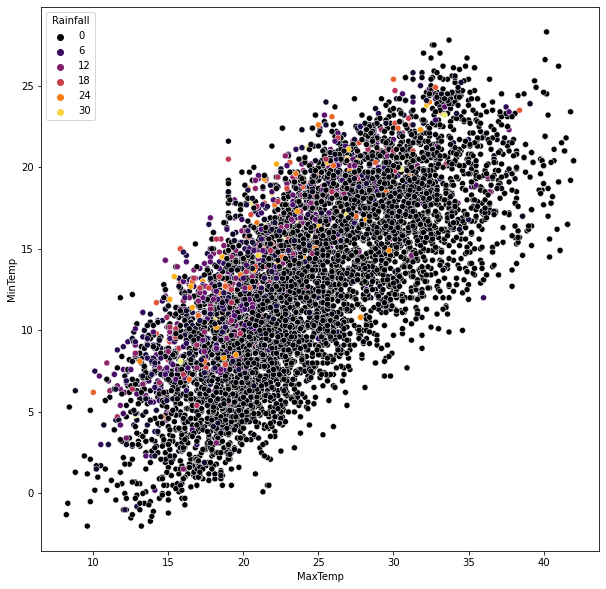

In [244]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'MaxTemp',y = 'MinTemp', hue = 'Rainfall', palette = 'inferno',data=df)
plt.show()

# Label Encoding:

In [267]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [268]:
df['Rainfall'] = le.fit_transform(df['Rainfall'])

In [269]:
df

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0            1     13.4     22.9         5           13           44.0   
1            1      7.4     25.1         0           14           44.0   
2            1     12.9     25.7         0           15           46.0   
3            1      9.2     28.0         0            4           24.0   
4            1     17.5     32.3         8           13           41.0   
...        ...      ...      ...       ...          ...            ...   
8420         9      2.8     23.4         0            0           31.0   
8421         9      3.6     25.3         0            6           22.0   
8422         9      5.4     26.9         0            3           37.0   
8423         9      7.8     27.0         0            9           28.0   
8424         9     14.9     19.0         0           16           39.0   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0             13          14          20.0          24.0         71.0   
1              6          15           4.0          22.0         44.0   
2             13          15          19.0          26.0         38.0   
3              9           0          11.0           9.0         45.0   
4              1           7           7.0          20.0         82.0   
...          ...         ...           ...           ...          ...   
8420           9           1          13.0          11.0         51.0   
8421           9           3          13.0           9.0         56.0   
8422           9          14           9.0           9.0         53.0   
8423          10           3          13.0           7.0         51.0   
8424           2           2          17.0          17.0         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  \
0            22.0       1007.7       1007.1     16.9     21.8          0   
1            25.0       1010.6       1007.8     17.2     24.3          0   
2            30.0       1007.6       1008.7     21.0     23.2          0   
3            16.0       1017.6       1012.8     18.1     26.5          0   
4            33.0       1010.8       1006.0     17.8     29.7          0   
...           ...          ...          ...      ...      ...        ...   
8420         24.0       1024.6       1020.3     10.1     22.4          0   
8421         21.0       1023.5       1019.1     10.9     24.5          0   
8422         24.0       1021.0       1016.8     12.5     26.1          0   
8423         24.0       1019.4       1016.5     15.1     26.0          0   
8424         36.0       1020.2       1017.9     15.0     20.9          0   

      RainTomorrow  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
8420             0  
8421             0  
8422             0  
8423             0  
8424             2  

[8061 rows x 18 columns]

# Model Building:

In [411]:
X = df.drop(columns = ['Rainfall'])
y = df['Rainfall']

In [412]:
X_train,X_test,y_train,y_test = train_test_split(pca_X,y,test_size=.3,random_state=40)

#### DecisionTreeClassifier

In [413]:
dtc = DecisionTreeClassifier()

In [414]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [415]:
dtc.score(X_train,y_train)

1.0

In [416]:
pred_DT = dtc.predict(X_test)

In [417]:
print(accuracy_score(y_test,pred_DT))

0.7064902852418354


In [418]:
print(confusion_matrix(y_test,pred_LR))

[[1636    0    1 ...    0    0    0]
 [   5    0    0 ...    0    0    0]
 [ 119    0    1 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    1    0]]


In [419]:
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1648
           1       0.00      0.00      0.00         5
           2       0.50      0.01      0.02       120
           3       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        21
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00        24
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        14
          13       0.05      0.06      0.06        16
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00         1
          17       0.08      0.09      0.08        11
          18       0.00      0.00      0.00         1
          19       0.00    

#### SVC:

In [420]:
sv = SVC()

In [421]:
sv.fit(X_train,y_train)

SVC()

In [422]:
sv.score(X_train,y_train)

0.6869904289259128

In [423]:
pred_SV = sv.predict(X_test)

In [424]:
print(accuracy_score(y_test,pred_SV))

0.6858205870194295


In [425]:
print(confusion_matrix(y_test,pred_SV))

[[1647    0    0 ...    0    0    0]
 [   5    0    0 ...    0    0    0]
 [ 120    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [426]:
print(classification_report(y_test,pred_SV))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1648
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00       120
           3       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        21
           8       0.00      0.00      0.00        22
           9       0.08      0.17      0.11        24
          10       0.06      0.09      0.07        23
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        14
          13       0.04      0.06      0.05        16
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00        11
          18       0.00      0.00      0.00         1
          19       0.00    

#### LogisticRegression:

In [427]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [428]:
LR.score(X_train,y_train)

0.6770648706132577

In [429]:
pred_LR = LR.predict(X_test)

In [430]:
print(accuracy_score(y_test,pred_LR))

0.6833402232327408


In [431]:
print(confusion_matrix(y_test,pred_SV))

[[1647    0    0 ...    0    0    0]
 [   5    0    0 ...    0    0    0]
 [ 120    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [432]:
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1648
           1       0.00      0.00      0.00         5
           2       0.50      0.01      0.02       120
           3       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        21
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00        24
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        14
          13       0.05      0.06      0.06        16
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00         1
          17       0.08      0.09      0.08        11
          18       0.00      0.00      0.00         1
          19       0.00    

#### RandomForestClassifier:

In [435]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [436]:
RF.score(X_train,y_train)

0.999822757887274

In [437]:
pred_RF = RF .predict(X_test)

In [438]:
print(accuracy_score(y_test,pred_RF))

0.7755270773046713


In [439]:
print(confusion_matrix(y_test,pred_RF))

[[1638    0    5 ...    0    0    0]
 [   5    0    0 ...    0    0    0]
 [  84    0   36 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [440]:
print(classification_report(y_test,pred_RF))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91      1648
           1       0.00      0.00      0.00         5
           2       0.77      0.30      0.43       120
           3       0.95      0.30      0.45        61
           5       0.75      0.30      0.43        30
           6       0.00      0.00      0.00         1
           7       1.00      0.38      0.55        21
           8       1.00      0.32      0.48        22
           9       0.60      0.25      0.35        24
          10       0.50      0.39      0.44        23
          11       0.00      0.00      0.00         1
          12       0.22      0.14      0.17        14
          13       0.71      0.75      0.73        16
          15       0.46      0.43      0.44        14
          16       1.00      1.00      1.00         1
          17       0.57      0.36      0.44        11
          18       1.00      1.00      1.00         1
          19       0.40    

#### KNeighborsClassifier

In [441]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [442]:
KNN.score(X_train,y_train)

0.7305919886565048

In [443]:
pred_k = KNN.predict(X_test)

In [445]:
print(accuracy_score(y_test,pred_k))
print(confusion_matrix(y_test,pred_k))
print(classification_report(y_test,pred_k))

0.6783794956593634
[[1605    0   23 ...    0    0    0]
 [   3    1    1 ...    0    0    0]
 [ 112    0    7 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1648
           1       1.00      0.20      0.33         5
           2       0.18      0.06      0.09       120
           3       0.00      0.00      0.00        61
           5       0.14      0.03      0.05        30
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        21
           8       0.00      0.00      0.00        22
           9       0.14      0.29      0.19        24
          10       0.09      0.13      0.11        23
          11       0.00      0.00      0.00         1
          12       0.12      0.14      0.13        14
          13       0.04      0.06      0.05       

### XGBClassifier

In [446]:
XGB = XGBClassifier()
XGB.fit(X_train,y_train)

[23:13:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [447]:
XGB.score(X_train,y_train)

0.8504076568592698

In [449]:
pred_XGB = XGB.predict(X_test)

In [450]:
print(accuracy_score(y_test,pred_XGB))
print(confusion_matrix(y_test,pred_XGB))
print(classification_report(y_test,pred_XGB))

0.7081438610996279
[[1551    5   34 ...    0    0    0]
 [   4    0    1 ...    0    0    0]
 [  90    0   18 ...    0    0    0]
 ...
 [   0    0    0 ...    1    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1648
           1       0.00      0.00      0.00         5
           2       0.24      0.15      0.18       120
           3       0.33      0.13      0.19        61
           4       0.00      0.00      0.00         0
           5       0.15      0.23      0.18        30
           6       0.00      0.00      0.00         1
           7       0.56      0.24      0.33        21
           8       0.17      0.14      0.15        22
           9       0.25      0.12      0.17        24
          10       0.20      0.13      0.16        23
          11       0.00      0.00      0.00         1
          12       0.22      0.14      0.17       

# CROSS VALIDATION:

In [451]:
#decisiontree
print(cross_val_score(dtc,pca_X,y,cv=5).mean())

0.6619647436538424


In [452]:
#SVC
print(cross_val_score(sv,pca_X,y,cv=5).mean())

0.6710090471494786


In [453]:
#logisticRegression
print(cross_val_score(LR,pca_X,y,cv=5).mean())

0.6614560818658572


In [454]:
#Randomforest
print(cross_val_score(RF,pca_X,y,cv=5).mean())

0.7427199752630227


In [455]:
#KNN
print(cross_val_score(KNN,pca_X,y,cv=5).mean())

0.6555015160628824


In [456]:
#XGB
print(cross_val_score(XGB,pca_X,y,cv=5).mean())

[23:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

### From Accuracy score and Cross Validation score we can conclude that RandomForestClassifier as our best fitting model.

# Hyper Parameter Tuning:

In [457]:
RFC = RandomForestClassifier()

In [458]:
parametrs = {'max_depth':[6,7,8],'max_features':['auto','sqrt'],'n_estimators':[200,300],'criterion' :['gini','entropy']}

In [459]:
Randomforest = GridSearchCV(RFC, parametrs, cv=5)

In [460]:
Randomforest.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

In [461]:
Randomforest.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [463]:
RFC.fit(X_train,y_train)
pred_RF = RFC.predict(X_test)
a = accuracy_score(y_test,pred_RF)
print(a*100)

77.67672591980157


# Saving:

In [468]:
import joblib

In [469]:
joblib.dump(RFC,"Rainfall.pkl")

['Rainfall.pkl']

# !!!!TAHNK YOU!!!!